In [515]:
import pandas as pd

In [516]:
import numpy as np

In [517]:
from helper import *

In [518]:
path='/home/rachel/Galvanize/capston1/data/'

df dataframeis the first 1000 rows of the dataset

In [213]:
df = pd.read_json(path+'COAL.json', orient = 'index').iloc[:1000,:]

In [214]:
type(df)

pandas.core.frame.DataFrame

useful data (quarterly/annual ash content) is nested in a dictionary inside the data column of each row.

The functions from the helper.py, used below, expands the coal df to include all the possible keys in the data dictionaries , and fills rows with the corresponding values from the dictionary.

In [215]:
all_keys = all_keys(df)  # all possible yea values (years)
data_df = data_to_df(all_keys,df) # creates a data_df filled with zeros with cols=allkeys.
new_df = concat_to_df(df,data_df)  # concats the data_df to the main df
fill_data_vals(new_df) # uses the dictionary for each row to fill te new columns

In [216]:
new_df.iloc[:,-86:]

,2003Q2,2002Q2,2013Q3,2002,2008Q2,2012Q3,2013Q2,2016,2011,2002Q3,...,2014,2012Q1,2003,2014Q1,2014Q4,2003Q1,2016Q1,2003Q4,2009Q4,2007Q1
0,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,7.53,0.0,...,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00
1,0.00,0.00,13.327886,0.0,16.174050,12.518092,11.335796,0.00,0.00,0.0,...,0.00,13.459852,0.0,13.742132,13.237455,0.00,12.910289,0.00,15.155350,0.00
2,0.00,0.00,4.841968,0.0,5.216381,4.984614,4.828248,0.00,0.00,0.0,...,0.00,4.901699,0.0,4.856574,4.880440,0.00,4.730833,0.00,5.222586,0.00
3,6.93,8.87,8.220000,0.0,9.050000,NaN,8.480000,0.00,0.00,7.4,...,0.00,NaN,0.0,7.940000,7.580000,7.73,0.000000,8.68,NaN,9.88
4,0.00,0.00,7.721398,0.0,6.174875,7.769639,8.089866,0.00,0.00,0.0,...,0.00,7.724420,0.0,7.758537,7.683500,0.00,0.000000,0.00,7.134017,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.0,...,0.00,0.000000,0.0,0.000000,0.000000,0.00,447.000000,0.00,0.000000,0.00
996,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,73.03,181.45,0.0,...,118.48,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00
997,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.0,...,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00
998,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,182.78,0.0,...,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00


the f column informs you if the row records anually or quarterly

In [217]:
new_df["f"].head()

0    A
1    Q
2    Q
3    Q
4    Q
Name: f, dtype: object

some inputs for geography are groups of states. like mountain region which consists of "USA-AZ+USA-CO+USA-ID+USA-MT+USA-NM+USA-NV+USA-UT+USA-WY"

In [218]:
# used to check how many rows per state there where
len(new_df.loc[new_df['geography']=='USA-AL'])

0

In [339]:
new_df['name'][900:1000]

900    Export price : coke : Honduras : all terminals...
901    Export price : coke : Honduras : all terminals...
902    Export price : coke : Indonesia : Los Angeles,...
903    Export price : coke : Indonesia : Los Angeles,...
904    Export price : coke : Indonesia : all terminal...
                             ...                        
995    Export price : metallurgical : Australia : all...
996    Export price : metallurgical : Bosnia And Herz...
997    Export price : metallurgical : South Korea (Re...
998    Export price : metallurgical : South Korea (Re...
999    Export price : metallurgical : South Korea (Re...
Name: name, Length: 100, dtype: object

coal data set includes = ash content And export price

I have noticed that when ash content reporting come from a region the iso3166 colum is nan. so below i am makeing a subset df of just coal ash reporting by state with only useful columns [name,f, description, iso3166, and the last 86 columns which are the data]


In [380]:

coal_ash_df = new_df[new_df['name'].str.match('Ash content')]
coal_ash_df.shape
#coal_ash_df.head(3)

(120, 106)

In [220]:
# filtering out anual data
coal_ash_df = coal_ash_df[coal_ash_df['f']=='A']
#coal_ash_df.shape

In [221]:
coal_ash_df.iloc[:,-86:]

,2003Q2,2002Q2,2013Q3,2002,2008Q2,2012Q3,2013Q2,2016,2011,2002Q3,...,2014,2012Q1,2003,2014Q1,2014Q4,2003Q1,2016Q1,2003Q4,2009Q4,2007Q1
0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,7.53,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,6.32,0.0,0.0,0.0,8.48,6.26,0.0,...,6.87,0.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.00,0.0,0.0,0.0,7.94,9.18,0.0,...,8.25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.00,0.0,0.0,0.0,7.94,8.51,0.0,...,8.13,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.00,0.0,0.0,0.0,7.87,7.08,0.0,...,7.77,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9.00,9.58,0.0,...,9.21,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.00,0.0,0.0,0.0,8.50,NaN,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9.96,9.56,0.0,...,9.69,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.00,0.0,0.0,0.0,13.69,13.85,0.0,...,13.55,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,8.73,0.0,0.0,0.0,7.13,6.71,0.0,...,7.02,0.0,6.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0


62 rows that report quarterly. 58 rows report quarterly

In [222]:
# filtering out states from region reports
coal_ash_df.dropna(subset=['iso3166'],inplace=True)
coal_ash_df.shape

(46, 106)

In [223]:
# just name and state
coal_ash_df_1= coal_ash_df.filter(items=['name','iso3166'])
coal_ash_df_1.shape

(46, 2)

In [224]:
#just year columns
coal_ash_df_2 = coal_ash_df.iloc[:,-86:]
coal_ash_df_2.shape

(46, 86)

In [225]:
# concatinating the two sets of columns to get only useful info
ash_anual_state_df = coal_ash_df_1.join(coal_ash_df_2)
ash_anual_state_df.shape

(46, 88)

In [226]:
# filtering for just anual data
anual_cols = [c for c in ash_anual_state_df.columns if not 'Q' in c]

ash_anual_state_df = ash_anual_state_df[sorted(anual_cols)]


**ash_anual_state_df is a datframe of ash content per state per year**

In [227]:
ash_anual_state_df#.iloc[:,:17]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,iso3166,name
0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.70,6.60,7.53,0.00,0.00,0.00,0.00,0.00,USA-OH,Ash content : Ohio : electric utility cogen : ...
12,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.77,7.41,6.97,7.08,7.67,7.66,7.77,7.39,7.87,USA-NH,Ash content : New Hampshire : electric utility...
14,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.40,9.51,9.30,9.58,9.26,9.11,9.21,9.21,9.00,USA-OH,Ash content : Ohio : electric power (total) : ...
17,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,7.87,8.44,9.69,NaN,NaN,0.00,0.00,6.92,8.50,USA-MT,Ash content : Montana : commercial and institu...
19,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.90,9.69,9.58,9.56,8.89,8.85,9.69,10.05,9.96,USA-MT,Ash content : Montana : independent power prod...
20,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,15.92,15.24,14.27,13.85,12.49,12.65,13.55,13.55,13.69,USA-MS,Ash content : Mississippi : independent power ...
24,0.0,0.0,8.73,6.08,6.18,6.81,6.42,6.47,6.70,6.44,6.60,6.71,6.86,6.47,7.02,7.14,7.13,USA-OH,Ash content : Ohio : coke plants : annual
26,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,7.38,7.13,6.89,7.05,7.93,8.63,9.50,9.38,9.14,USA-OH,Ash content : Ohio : independent power produce...
27,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.10,9.40,10.10,9.80,9.30,9.20,9.70,9.40,0.00,USA-MT,Ash content : Montana : electric utility : annual
29,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.90,9.69,9.58,9.56,8.89,8.85,9.69,10.05,9.96,USA-MT,Ash content : Montana : electric utility non-c...


In [228]:
# histogram of north carolina ash content row
NC_ash = ash_anual_state_df[ash_anual_state_df['iso3166']=='USA-NC']
NC_ash

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,iso3166,name
64,0.0,0.0,7.22,7.12,7.33,8.02,7.63,7.54,7.65,7.17,7.47,7.52,7.35,7.92,7.61,6.81,7.23,USA-NC,Ash content : North Carolina : other industria...
66,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.23,6.04,6.42,0.00,USA-NC,Ash content : North Carolina : electric utilit...
68,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,7.88,10.68,9.88,9.38,7.82,8.55,9.10,9.90,0.00,USA-NC,Ash content : North Carolina : electric utilit...
77,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,8.49,8.28,8.26,8.27,8.52,8.78,8.07,8.36,8.87,USA-NC,Ash content : North Carolina : commercial and ...
87,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,11.59,10.96,11.21,11.41,10.69,9.91,9.60,9.98,9.82,USA-NC,Ash content : North Carolina : electric power ...


In [229]:
NC_ash.shape


(5, 19)

Text(0.5, 0, 'percentage')

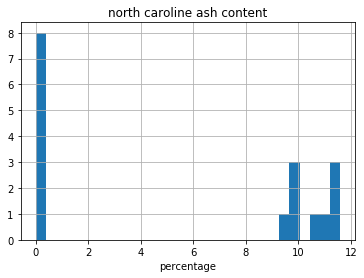

In [231]:
# just getting ash content for total electric power plants
import matplotlib.pyplot as plt
NC_ash_electric = NC_ash[NC_ash['name'].str.match('Ash content : North Carolina : electric power')]
#NC_ash_electric = NC_ash.iloc[87]
type(NC_ash_electric)
NC_ash_electric.iloc[:,:17].T.hist(bins=30)
plt.title("north caroline ash content")
plt.xlabel("percentage")


**This shows me there was no ash content reported for most years...**

 maye we can look at some scatter plots ....

In [300]:
total_ash = ash_anual_state_df.groupby(['iso3166']).mean().T
total_ash#.reset_index()


iso3166,USA-MO,USA-MS,USA-MT,USA-NC,USA-ND,USA-NE,USA-NH,USA-NJ,USA-NM,USA-NV,USA-NY,USA-OH,USA-OK,USA-OR,USA-PA
2000,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.000000,0.00,0.00,0.000,0.000,0.000000,0.000000,0.000000
2001,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.000000,0.00,0.00,0.000,0.000,0.000000,0.000000,0.000000
2002,0.00,0.00,0.000,1.444,0.000,0.00,0.00,0.000000,0.00,0.00,1.038,1.746,1.913333,2.163333,2.601429
2003,0.00,0.00,0.000,1.424,0.000,0.00,0.00,0.000000,0.00,0.00,1.076,1.216,1.886667,2.583333,2.698571
2004,0.00,0.00,0.000,1.466,0.000,0.00,0.00,0.000000,0.00,0.00,1.298,1.236,2.130000,2.430000,2.855714
2005,0.00,0.00,0.000,1.604,0.000,0.00,0.00,0.000000,0.00,0.00,1.270,1.362,2.170000,0.000000,2.878571
2006,0.00,0.00,0.000,1.526,0.000,0.00,0.00,0.000000,0.00,0.00,1.176,1.284,2.233333,0.000000,2.731429
2007,0.00,0.00,0.000,1.508,0.000,0.00,0.00,0.000000,0.00,0.00,1.154,1.294,2.180000,0.000000,2.780000
2008,8.48,15.92,9.330,7.122,9.055,5.17,6.77,6.873333,21.96,5.72,7.752,6.740,8.543333,4.740000,15.565714
2009,8.51,15.24,9.380,7.418,9.370,5.18,7.41,6.466667,21.98,5.02,7.150,7.962,8.110000,4.830000,15.544286


In [301]:
total_ash.columns


Index(['USA-MO', 'USA-MS', 'USA-MT', 'USA-NC', 'USA-ND', 'USA-NE', 'USA-NH',
       'USA-NJ', 'USA-NM', 'USA-NV', 'USA-NY', 'USA-OH', 'USA-OK', 'USA-OR',
       'USA-PA'],
      dtype='object', name='iso3166')

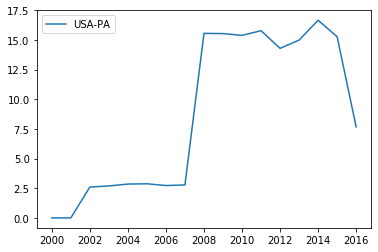

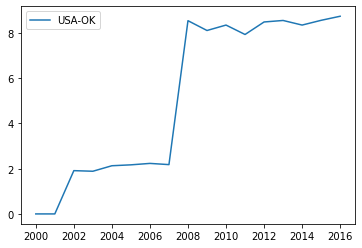

In [302]:

total_ash.plot(y='USA-PA')
total_ash.plot(y='USA-OK')

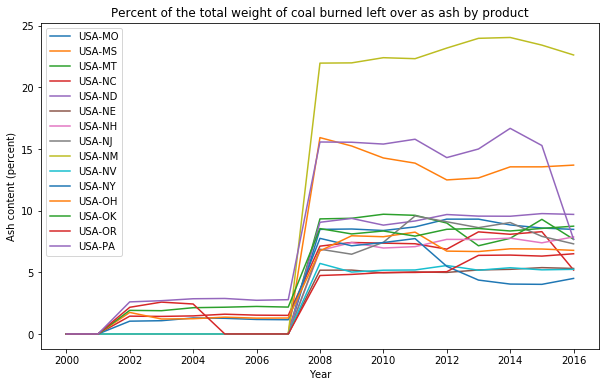

In [472]:
### lets try and get scatterplot to lay on top of each
x = np.arange(2000,2017)

fig, axs = plt.subplots()
fig.set_size_inches(10,6)
for col in total_ash.columns:
    axs.plot(x,total_ash[col], label=col)
axs.legend()
axs.set_title('Percent of the total weight of coal burned left over as ash by product')
axs.set_xlabel('Year')
axs.set_ylabel('Ash content (percent)')
plt.savefig('coal-ash.png');



**WHat happend in 2008??:**
 https://www.eia.gov/coal/review/pdf/feature08.pdf
 - There was a change over in preadents which  may have changed some regulations on the cleanlyness of coal or even how the ash byproduct is reported


**Lets look in the other files in this collection to see what what going on with coal arouf 2008**

In [519]:
#.## reading in TOTAL.json
total_df = json_read(path+'TOTAL.json')
total_df.shape

(1000, 7)

In [520]:
total_all_keys = all_keys(total_df)  # all possible yea values (years)
total_data_df = data_to_df(total_all_keys,total_df) # creates a data_df filled with zeros with cols=allkeys.
total_new_df = concat_to_df(total_df,total_data_df)  # concats the data_df to the main df
fill_data_vals(total_new_df)

In [521]:
#changing the name
totals = total_new_df

In [361]:
totals.shape

(1000, 609)

In [363]:
totals


,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908
0,Distributed Solar Energy Consumption for Elect...,Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 11.944, '201703': 10.639, '201702':...",0,0,NA,...,0.023,NA,0.016,0.47,NA,0.054,0.011,0.353,NA,NA
1,Distributed Solar Photovoltaic Generation: Res...,Million Kilowatthours,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 1281.654, '201703': 1141.675, '2017...",0,0,NA,...,2.297,NA,1.562,48.117,NA,5.401,1.028,35.799,NA,NA
2,Solar Energy Consumed by the Residential Secto...,Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 17.584, '201703': 15.757, '201702':...",0,0,NA,...,4.009,NA,5.886,5.308,NA,3.396,5.102,5.184,NA,NA
3,"Utility-Scale Solar Energy Consumption: Total,...",Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 44.884, '201703': 41.698, '201702':...",0,0,NA,...,0.183,NA,0.51,0.97,0.014,0.078,0.226,0.928,NA,NA
4,Utility-Scale Solar Electricity Net Generation...,Million Kilowatthours,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 4816.383, '201703': 4474.468, '2017...",0,0,NA,...,17.944,NA,49.505,99.416,1.358,7.758,21.626,94.141,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Residual Fuel Oil Stocks, Electric Power Secto...",Thousand Barrels,A,1949,2016,2017-05-25T08:57:27-04:00,"{'2016': 11669.94, '2015': 12566.008, '2014': ...",25722.5,105351,0,...,0,0,0,0,0,0,0,0,0,0
996,Residual Fuel Oil Consumption for Electricity ...,Thousand Barrels,A,1949,2016,2017-05-25T08:57:27-04:00,"{'2016': 10238.123, '2015': 14124.37, '2014': ...",109235,391163,0,...,0,0,0,0,0,0,0,0,0,0
997,Petroleum Consumed by the Transportation Secto...,Trillion Btu,A,1949,2016,2017-05-25T08:57:27-04:00,"{'2016': 25676.844, '2015': 25221.233, '2014':...",25916.6,19009.2,0,...,0,0,0,0,0,0,0,0,0,0
998,"Petroleum, Excluding Biofuels, Transportation ...",Million Metric Tons of Carbon Dioxide,A,1973,2016,2017-05-25T08:57:27-04:00,"{'2016': 1839.939, '2015': 1805.793, '2014': 1...",1851.75,1363.29,0,...,0,0,0,0,0,0,0,0,0,0


In [522]:
# lets break this up 

coal_totals = totals[totals['name'].str.contains('Coal')]

In [384]:
coal_totals.iloc[15:,:]

,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908
230,"Coal Stocks, Industrial Sector, Coke Plants, E...",Thousand Short Tons,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 1648.13, '201703': 1387.757, '20170...",0,0,5434,...,1942.69,6998,2949.43,1999.65,3762.72,1343.63,3360.84,1560.16,7413,9021
231,"Coal Stocks, Industrial Sector, Other, End of ...",Thousand Short Tons,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': 3635.143, '2015': 4381.526, '2014': 4...",5791.51,11951,0,...,0,0,0,0,0,0,0,0,0,0
232,"Coal Stocks, Industrial Sector, Other, End of ...",Thousand Short Tons,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 5031.395, '201703': 3219.679, '2017...",0,0,9308,...,5568.63,10370,5990.48,5266.43,8330.6,4842.27,6671.49,4873.14,8269,9509
233,"Coal Consumption, Annual",Trillion Btu,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': 14226.519, '2015': 15548.87, '2014': ...",21904,15422.8,0,...,0,0,0,0,0,0,0,0,0,0
234,"Coal Consumption, Monthly",Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 942.775, '201703': 1038.644, '20170...",0,0,1229.66,...,1828.88,1168.68,1477.78,1421.73,1601.23,2020.87,1571.76,1667.48,1166.96,1342.58
254,"Coal Stocks, End-Use Sectors Total, End of Per...",Thousand Short Tons,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': 5671.134, '2015': 7011.963, '2014': 7...",7155.96,21018,0,...,0,0,0,0,0,0,0,0,0,0
255,"Coal Residential Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 'NA', '201703': 'NA', '201702': 'NA...",0,0,0.235,...,0.201,1.005,0.128,NA,0.216,0.161,0.14,NA,0.455,0.179
256,"Coal Consumed by the Residential Sector, Monthly",Thousand Short Tons,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 'NA', '201703': 'NA', '201702': 'NA...",0,0,108.29,...,88.166,461.02,58.116,NA,96.768,76.013,62.195,NA,211.83,84.2
257,"Coal Stock Change, Annual",Thousand Short Tons,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': -35114.929, '2015': 40703.74, '2014':...",10215,25595.1,0,...,0,0,0,0,0,0,0,0,0,0
258,"Coal Stock Change, Monthly",Thousand Short Tons,M,197301,201706,2017-07-26T11:59:01-04:00,"{'201706': 'NA', '201705': 'NA', '201704': 495...",0,0,363.137,...,2068.92,-3824.37,1441.19,13302.9,-5536.77,-6301.72,-3774.63,9313.53,8410.86,4532.61


In [523]:
# lets sub set this even more
#creating a table of the rows that have to do woth coal emission
CO2_coal = coal_totals[coal_totals['name'].str.contains('CO2')]

In [395]:
CO2_coal.head(10
        )

,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908
255,"Coal Residential Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 'NA', '201703': 'NA', '201702': 'NA...",0,0,0.235,...,0.201,1.005,0.128,NA,0.216,0.161,0.14,NA,0.455,0.179
301,"Coal Coke Net Imports CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': -0.154, '201703': -0.17500000000000...",0,0,-0.363,...,0.669,0.04,0.182,-0.285,0.539,0.858,0.464,0.865,1.634,0.976
324,"Coal Commercial Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 0.1, '201703': 0.23800000000000002,...",0,0,1.145,...,1.471,1.712,0.584,0.481,0.767,1.451,0.526,0.5,1.522,0.716
352,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,A,1973,2016,2017-07-26T11:59:01-04:00,"{'2016': 1354.185, '2015': 1480.243, '2014': 1...",2094.56,1435.74,0,...,0,0,0,0,0,0,0,0,0,0
353,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 89.734, '201703': 99.086, '201702':...",0,0,114.596,...,174.724,108.752,140.392,135.404,150.736,193.692,148.057,160.114,110.794,125.895
355,"Coal Transportation Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 0, '201703': 0, '201702': 0, '20170...",0,0,0,...,0,0.015,0,0,0,0,0,0,0,0
377,"Coal Electric Power Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 81.449, '201703': 89.622, '201702':...",0,0,96.39,...,154.387,71.118,120.469,125.161,128.537,174.92,126.031,144.524,79.494,97.246
422,"Coal Industrial Sector CO2 Emissions, Annual",Million Metric Tons of Carbon Dioxide,A,1973,2016,2017-07-26T11:59:01-04:00,"{'2016': 112.8, '2015': 128.86, '2014': 142.98...",188.027,289.253,0,...,0,0,0,0,0,0,0,0,0,0
423,"Coal Industrial Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 8.339, '201703': 9.401, '201702': 9...",0,0,17.189,...,17.997,34.862,19.028,10.047,20.676,16.302,20.895,14.226,27.689,26.779


In [524]:
#droping some columns, making name clumn the index and transposing
CO2_coal = CO2_coal.drop(['units', 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T

In [525]:
# sorting by the date
CO2_coal = CO2_coal.sort_index(axis=0)

In [526]:
CO2_coal.columns

Index(['Coal Residential Sector CO2 Emissions, Monthly',
       'Coal Coke Net Imports CO2 Emissions, Monthly',
       'Coal Commercial Sector CO2 Emissions, Monthly',
       'Coal, Including Coal Coke Net Imports, CO2 Emissions, Annual',
       'Coal, Including Coal Coke Net Imports, CO2 Emissions, Monthly',
       'Coal Transportation Sector CO2 Emissions, Monthly',
       'Coal Electric Power Sector CO2 Emissions, Monthly',
       'Coal Industrial Sector CO2 Emissions, Annual',
       'Coal Industrial Sector CO2 Emissions, Monthly'],
      dtype='object', name='name')

In [427]:
CO2_coal['Coal Residential Sector CO2 Emissions, Monthly'].count()

602

In [527]:
# take the residential colum and make series and drop the NANs
res = CO2_coal['Coal Residential Sector CO2 Emissions, Monthly'].sort_index()
#it turns out the 'NA' values are just strings  so to use nan methods i will have to convert the string to np.NAN
res.dropna()


1949       0
1950       0
1951       0
1952       0
1953       0
          ..
201702    NA
201703    NA
201704    NA
201705     0
201706     0
Name: Coal Residential Sector CO2 Emissions, Monthly, Length: 602, dtype: object

In [528]:
res=res.replace('NA',float('NAN'))

In [529]:
res.isnull().sum()

112

In [530]:
len(res)

602

In [531]:
res=res.dropna()

In [627]:
# this should interpolate 112 values out of 602
x = CO2_coal.index
y_res = np.interp(x,res.index, res.values)

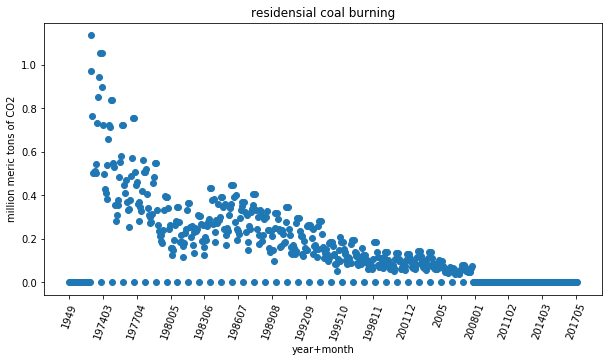

In [628]:
fig, axs = plt.subplots()
fig.set_size_inches(10,5)

axs.plot(x,y_res,'o')
axs.set_title('residensial coal burning')
axs.set_xlabel('year+month')
axs.set_ylabel('million meric tons of CO2')
#axs.set_xticks(rotation=90)
axs.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=70)
plt.savefig('residential_coal_burning.png')

**There is an obvious downword trend since the 1950, but lets take a closer look in to the 2000s to compare to our coal ash data.**


In [481]:
len(res)

490

In [547]:
res_2000s = res[res.index.str.startswith('20')]

In [548]:
len(res_2000s)

115

In [500]:
res_2000s[-20:]

200704    0.051
200705    0.050
200706    0.048
200707    0.049
200708    0.052
200709    0.047
200710    0.064
200711    0.076
200712    0.082
2008      0.000
2009      0.000
2010      0.000
2011      0.000
2012      0.000
2013      0.000
2014      0.000
2015      0.000
2016      0.000
201705    0.000
201706    0.000
Name: Coal Residential Sector CO2 Emissions, Monthly, dtype: float64

In [550]:
#checking for nans
res_2000s.isna().sum()

0

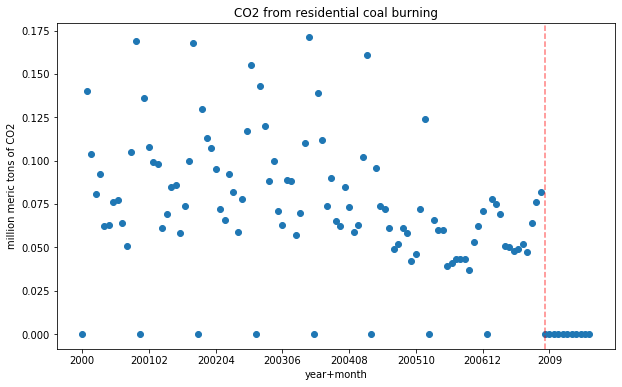

In [630]:
fig, axs = plt.subplots()
fig.set_size_inches(10,6)

axs.plot(res_2000s.index,res_2000s.values,'o')
axs.set_title('CO2 from residential coal burning')
axs.set_xlabel('year+month')
axs.set_ylabel('million meric tons of CO2')
#axs.set_xticklabels(res_2000s.index, rotation=90);
axs.xaxis.set_major_locator(plt.MaxNLocator(12))
axs.axvline('2008',color='r',linestyle='--',alpha=0.5)
plt.savefig('co2_res_2000.png');

**The red dashed line is right at 2008** once again the reporting has drastically changed. 

Lets look at CO2 from other sectors.

In [556]:
#Coal Electric Power Sector CO2 Emissions, Monthly
CO2_from_electric = CO2_coal['Coal Electric Power Sector CO2 Emissions, Monthly'].sort_index()

In [559]:
#checking for nans
CO2_from_electric.isna().sum()

0

In [560]:
#checking for non float
CO2_from_electric[type(CO2_from_electric.values) != float]

0.0

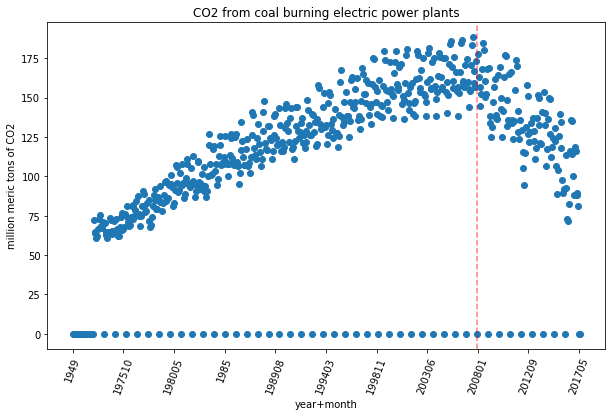

In [631]:
fig, axs = plt.subplots()
fig.set_size_inches(10,6)

axs.plot(CO2_from_electric.index,CO2_from_electric.values,'o')
axs.set_title('CO2 from coal burning electric power plants')
axs.set_xlabel('year+month')
axs.set_ylabel('million meric tons of CO2')
#axs.set_xticklabels(res_2000s.index, rotation=90);
axs.xaxis.set_major_locator(plt.MaxNLocator(12))
axs.axvline('2008',color='r',linestyle='--',alpha=0.5);
plt.xticks(rotation=70)
plt.savefig('co2_coal_electric.png');


**This look like reporting in the sector was good. and right at 2008 emission droped drastically. This is very exciting.**

lets see what else is in our totals.json

In [581]:

#droping some columns, making name clumn the index and transposing
wind_df = totals[totals['name'].str.contains('Wind')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)

In [582]:
wind_df.head(20)

name,"Wind Energy Consumed by the Commercial Sector, Monthly","Wind Energy Consumed by the Electric Power Sector, Monthly","Electricity Net Generation From Wind, Electric Power Sector, Monthly","Electricity Net Generation From Wind, All Sectors, Monthly","Wind Energy Consumed by the Industrial Sector, Monthly","Wind Energy Consumption/Production, Monthly","Wind Energy Consumed by the Electric Power Sector, Annual","Electricity Net Generation From Wind, Electric Power Sector, Annual","Electricity Net Generation From Wind, All Sectors, Annual","Wind Energy, Adjustment for Fossil Fuel Equivalence, Annual","Wind Energy, Transformed Into Electricity, Annual","Wind Energy Consumption/Production, Annual"
1949,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1950,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1951,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1952,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1953,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1954,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1955,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1956,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1957,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1958,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA


There are alot of nans and zeros becacause are data starts in the 1950s. lets look at the 2000s

In [584]:
wind_2000s = wind_df[wind_df.index.str.startswith('20')]

In [585]:
#wind power df
wind_2000s

name,"Wind Energy Consumed by the Commercial Sector, Monthly","Wind Energy Consumed by the Electric Power Sector, Monthly","Electricity Net Generation From Wind, Electric Power Sector, Monthly","Electricity Net Generation From Wind, All Sectors, Monthly","Wind Energy Consumed by the Industrial Sector, Monthly","Wind Energy Consumption/Production, Monthly","Wind Energy Consumed by the Electric Power Sector, Annual","Electricity Net Generation From Wind, Electric Power Sector, Annual","Electricity Net Generation From Wind, All Sectors, Annual","Wind Energy, Adjustment for Fossil Fuel Equivalence, Annual","Wind Energy, Transformed Into Electricity, Annual","Wind Energy Consumption/Production, Annual"
2000,0,0,0,0,0,0,57.057,5593.26,5593.26,37.973,19.084,57.057
200001,-,6.583,645.286,645.286,-,6.583,0,0,0,0,0,0
200002,-,7.201,705.904,705.904,-,7.201,0,0,0,0,0,0
200003,-,3.571,350.019,350.019,-,3.571,0,0,0,0,0,0
200004,-,3.367,330.074,330.074,-,3.367,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201702,0.096,201.987,21674.7,21691.6,0.061,202.144,0,0,0,0,0,0
201703,0.147,238.342,25575.9,25598.9,0.068,238.556,0,0,0,0,0,0
201704,0.131,236.536,25382.1,25403.1,0.065,236.731,0,0,0,0,0,0
201705,0,0,0,0,0,0,0,0,0,0,0,0


In [595]:
#solar power from 2000s
solar_df = totals[totals['name'].str.contains('Solar')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
solar_2000s = solar_df[solar_df.index.str.startswith('20')]

In [762]:
#uclear power in the 2000s
nuclear_df = totals[totals['name'].str.contains('Nuclear')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
nuclear_2000s = nuclear_df[nuclear_df.index.str.startswith('20')]
#totals[totals['name'].str.contains('Nuclear')]

In [597]:
#hydroelectric powe in the 2000s
hydro_df = totals[totals['name'].str.contains('Hydroelectric')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
hydro_2000s = hydro_df[hydro_df.index.str.startswith('20')]

In [598]:
# creating a sub df of geothermal energy in the 2000s
geotherm_df = totals[totals['name'].str.contains('Geothermal')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
geotherm_2000s = geotherm_df[geotherm_df.index.str.startswith('20')]

checking for other formes of reneable energy. I am perposly leaving out "biomass burning" becasue resent studies show that it is not good for the environmanet

In [572]:
totals[totals['name'].str.contains('Tidal')]

,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908


In [573]:
totals[totals['name'].str.contains('Ocean')]

,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908


In [574]:
totals[totals['name'].str.contains('Wave')]

,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908


**Lets plot the consumption/production column from each green sector. I believe this will give us a windo into the future of grean energy. are we using it faster or slower then we are producing it?**


In [633]:
#create x and y for wind
x = wind_2000s.index
y_wind = wind_2000s['Wind Energy Consumption/Production, Monthly'] 
#wind_2000s.columns

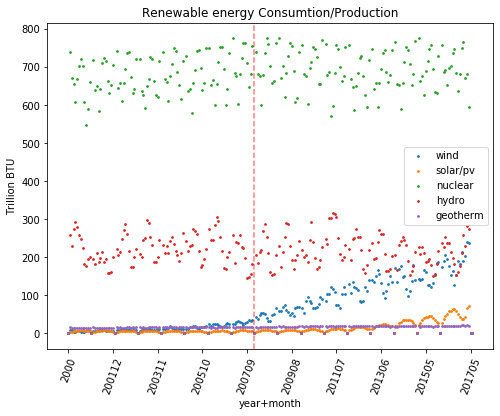

In [634]:
fig, axs = plt.subplots()
fig.set_size_inches(8,6)

marker_size = 3
axs.scatter(x,y_wind,label='wind',s=marker_size)
axs.scatter(x,solar_2000s['Solar/PV Energy Consumption/Production, Monthly'],label='solar/pv',s=marker_size)
axs.scatter(x,nuclear_2000s['Nuclear Electric Power Consumption/Production, Monthly'],label='nuclear',s=marker_size)
axs.scatter(x,hydro_2000s['Hydroelectric Power Consumption/Production, Monthly'],label='hydro',s=marker_size)
axs.scatter(x,geotherm_2000s['Geothermal Energy Consumption/Production, Monthly'],label='geotherm',s=marker_size)

axs.set_title('Renewable energy Consumtion/Production')
axs.set_xlabel('year+month')
axs.set_ylabel('Trillion BTU')
#axs.set_xticklabels(res_2000s.index, rotation=90);
axs.xaxis.set_major_locator(plt.MaxNLocator(12))
axs.axvline('2008',color='r',linestyle='--',alpha=0.5);
plt.xticks(rotation=70)
plt.legend()
#axs.axhline(0,color='k')
plt.savefig('renewable_production.png');

In [621]:
geotherm_2000s.columns


Index(['Geothermal Energy Consumed by the Residential Sector, Monthly',
       'Geothermal Energy Consumption/Production, Monthly',
       'Geothermal Energy Consumed by the Commercial Sector, Monthly',
       'Geothermal Energy Consumed by the Electric Power Sector, Monthly',
       'Electricity Net Generation From Geothermal, Electric Power Sector, Monthly',
       'Geothermal Energy Electric Power Sector CO2 Emissions, Monthly',
       'Electricity Net Generation From Geothermal, All Sectors, Monthly',
       'Geothermal Energy Consumed by the Industrial Sector, Monthly',
       'Geothermal Energy Electric Power Sector CO2 Emissions, Annual'],
      dtype='object', name='name')

Lets compare coal for electric power and nuclear for electric power

In [697]:
nuclear_2000s.head(20)

name,"Nuclear Generating Units, Capacity Factor, Monthly","Nuclear Electric Power Consumed by the Electric Power Sector, Monthly","Electricity Net Generation From Nuclear Electric Power, Electric Power Sector, Monthly","Nuclear Electric Power Consumption/Production, Monthly","Electricity Net Generation From Nuclear Electric Power, All Sectors, Monthly","Nuclear Share of Electricity Net Generation, Monthly","Nuclear Generating Units, Net Summer Capacity, End of Period, Monthly","Nuclear Generating Units, Total Operable Units, End of Period, Monthly"
2000,0,0,0,0,0,0,0,0
200001,93.8,737.981,70762.4,737.981,70762,21.6,97.411,104
200002,91,669.318,64178.5,669.318,64179,21.8,97.411,104
200003,83.5,654.279,62736.5,654.279,62737,20.8,97.411,104
200004,80.2,607.585,58259.1,607.585,58259,20.4,97.411,104
200005,84.8,667.205,63975.9,667.205,63976,19.8,97.411,104
200006,92.1,701.857,67298.6,701.857,67299,19.8,97.411,104
200007,95.4,719.306,68971.7,719.306,68972,19.3,97.411,104
200008,93.8,701.102,67226.1,701.102,67226,18.2,97.411,104
200009,87.8,607.662,58266.6,607.662,58267,18.6,97.411,104


In [718]:
#nuc_to_electric
nuc_to_electric = nuclear_2000s['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly']

In [719]:
type(nuc_to_electric)

pandas.core.series.Series

In [720]:
# lets just try taking out the zeros
nuc_to_electric = nuc_to_electric[nuc_to_electric !=0]

In [721]:
nuc_to_electric.index


Index(['200001', '200002', '200003', '200004', '200005', '200006', '200007',
       '200008', '200009', '200010',
       ...
       '201607', '201608', '201609', '201610', '201611', '201612', '201701',
       '201702', '201703', '201704'],
      dtype='object', length=208)

In [722]:
pd.to_datetime(nuc_to_electric.index,format='%Y%m')

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01'],
              dtype='datetime64[ns]', length=208, freq=None)

In [724]:
nuc_to_electric.index  =pd.to_datetime(nuc_to_electric.index,format='%Y%m')

In [781]:
nuc_to_electric = nuc_to_electric.reset_index()
#nuc_to_electric

In [731]:
nuc_to_electric['year'] = nuc_to_electric['index'].dt.year
nuc_to_electric['month'] = nuc_to_electric['index'].dt.month

In [780]:
#nuc_to_electric

In [748]:
nuc_to_electric['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'] =nuc_to_electric['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'].astype(float) 

In [779]:
#nuc_to_electric.info()


In [752]:
nuc_ave_month = nuc_to_electric.groupby(['month']).mean()

In [778]:
#nuc_ave_month.head(3)

In [782]:
#lets do the same for coal to electric
coal_totals
coal_df = coal_totals.drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
coal_2000s = coal_df[coal_df.index.str.startswith('20')]
coal_2000s['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly']

2000            0
200001    88158.1
200002    79412.3
200003    77677.5
200004    70002.6
           ...   
201702    47875.6
201703    48644.4
201704    44221.6
201705          0
201706          0
Name: Coal Consumption for Electricity Generation, Electric Power Sector, Monthly, Length: 227, dtype: object

In [783]:
coal_to_electric = coal_2000s['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly']
coal_to_electric = coal_to_electric[coal_to_electric !=0]
coal_to_electric.index  =pd.to_datetime(coal_to_electric.index,format='%Y%m')
coal_to_electric = coal_to_electric.reset_index()
coal_to_electric['year'] = coal_to_electric['index'].dt.year
coal_to_electric['month'] = coal_to_electric['index'].dt.month
coal_to_electric['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'] =coal_to_electric['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'].astype(float)
coal_ave_month = coal_to_electric.groupby(['month']).mean()

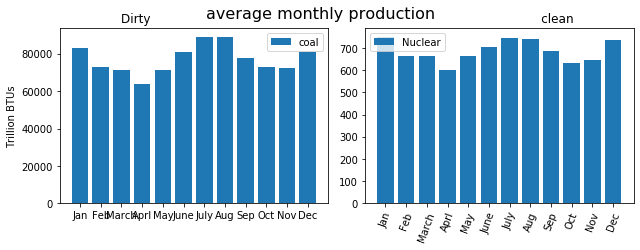

In [824]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(9,3.5)

ticks =['Jan','Feb','March','Aprl','May','June','July','Aug','Sep','Oct','Nov','Dec']
axs[0].bar(coal_ave_month.index,coal_ave_month['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'],label='coal',align='center',tick_label=ticks)
axs[0].set_title('Dirty                              ')


axs[1].set_title('                              clean')
axs[1].bar(nuc_ave_month.index, nuc_ave_month['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'],label='Nuclear',align='center',tick_label=ticks)

axs[0].legend()
axs[1].legend()
fig.suptitle('average monthly production',size=16)
axs[0].set_ylabel('Trillion BTUs')
plt.xticks(rotation=70)
plt.tight_layout();


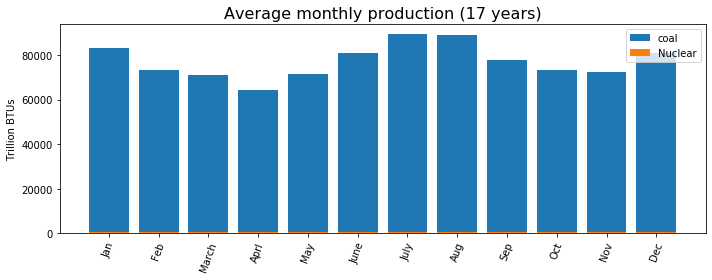

In [841]:
fig, axs = plt.subplots()
fig.set_size_inches(10,4)

ticks =['Jan','Feb','March','Aprl','May','June','July','Aug','Sep','Oct','Nov','Dec']
axs.bar(coal_ave_month.index,coal_ave_month['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'],label='coal',align='center',tick_label=ticks)
#axs.set_title('Dirty                              ')


#axs[1].set_title('                              clean')
axs.bar(nuc_ave_month.index, nuc_ave_month['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'],label='Nuclear',align='center',tick_label=ticks)

#axs[0].legend()
axs.legend()
axs.set_title('Average monthly production (17 years)',size=16)
axs.set_ylabel('Trillion BTUs')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('17yr-monthly-coal-nuc.png');


In [833]:
ave_coal_1year = coal_ave_month[coal_ave_month['year']==2017]
ave_nuc_1year = nuc_ave_month[nuc_ave_month['year']==2017]

In [838]:
coal_ave_month

,"Coal Consumption for Electricity Generation, Electric Power Sector, Monthly",year
month,,
1,83272.105778,2008.5
2,73065.255944,2008.5
3,71189.492111,2008.5
4,64084.339167,2008.5
5,71640.369118,2008.0
6,80796.364706,2008.0
7,89172.819412,2008.0
8,89068.030471,2008.0
9,77818.233000,2008.0


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (12,) and requested shape (0,)

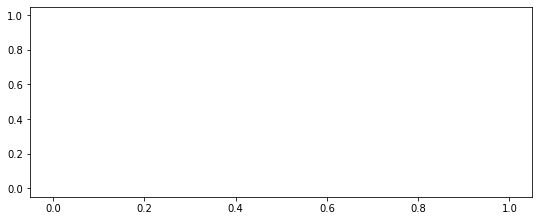

In [835]:
fig, axs = plt.subplots()
fig.set_size_inches(9,3.5)

ticks =['Jan','Feb','March','Aprl','May','June','July','Aug','Sep','Oct','Nov','Dec']
axs.bar(ave_coal_1year.index,ave_coal_1year['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'],label='coal',align='center',tick_label=ticks)


axs.bar(ave_nuc_1year.index, ave_nuc_1year['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'],label='Nuclear',align='center',tick_label=ticks)


axs.legend()
axs.set_title('average monthly production',size=16)
axs.set_ylabel('Trillion BTUs')
plt.xticks(rotation=70)
#plt.tight_layout();

In [681]:
# lets just try taking out the zeros
nuc_to_electric = nuc_to_electric[nuc_to_electric !=0]

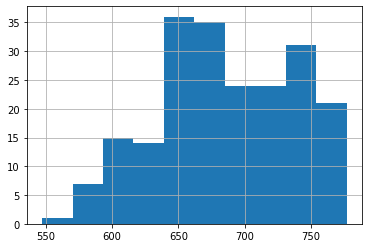

In [682]:
nuc_to_electric.hist()

2000            0
200001    88158.1
200002    79412.3
200003    77677.5
200004    70002.6
           ...   
201702    47875.6
201703    48644.4
201704    44221.6
201705          0
201706          0
Name: Coal Consumption for Electricity Generation, Electric Power Sector, Monthly, Length: 227, dtype: object

In [ ]:
# the proportion of electric that comes from petrolium . are electric ars the answer?